## Image Alignment

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Read Template and Scanned Image

Reading reference image :  images/form.jpg
Reading image to align :  images/scanned-form.jpg


Text(0.5, 1.0, 'Scanned Form')

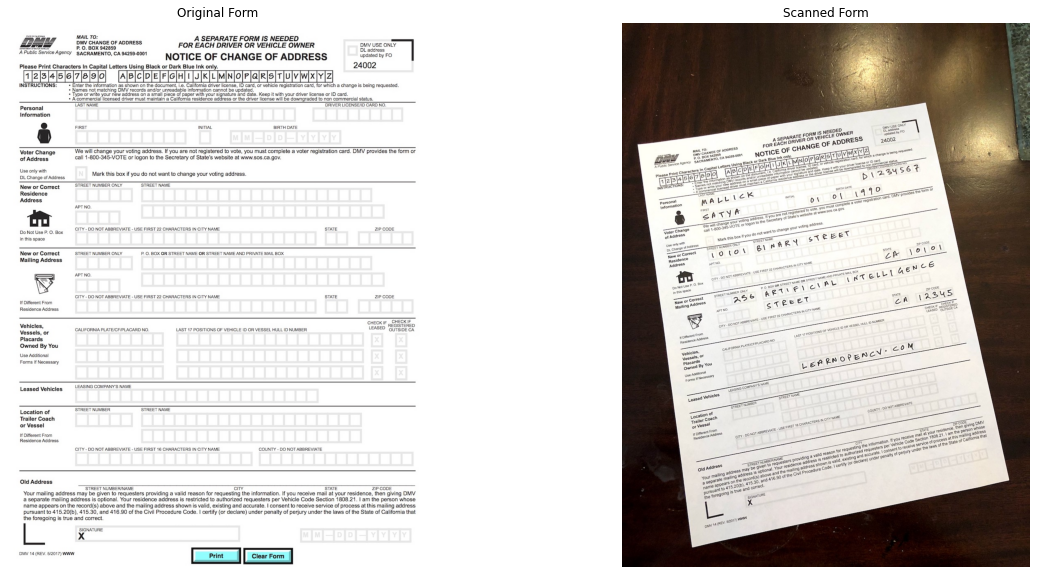

In [8]:
# Read reference image
refFilename = "images/form.jpg"
print("Reading reference image : ", refFilename)
im1 = cv.imread(refFilename, cv.IMREAD_COLOR)
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)

# Read image to be aligned
imFilename = "images/scanned-form.jpg"
print("Reading image to align : ", imFilename)
im2 = cv.imread(imFilename, cv.IMREAD_COLOR)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

# Display Images

plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

### Step 2: Find keypoints in both Images

Think of keypoints as corner points that are stable under image transformations.

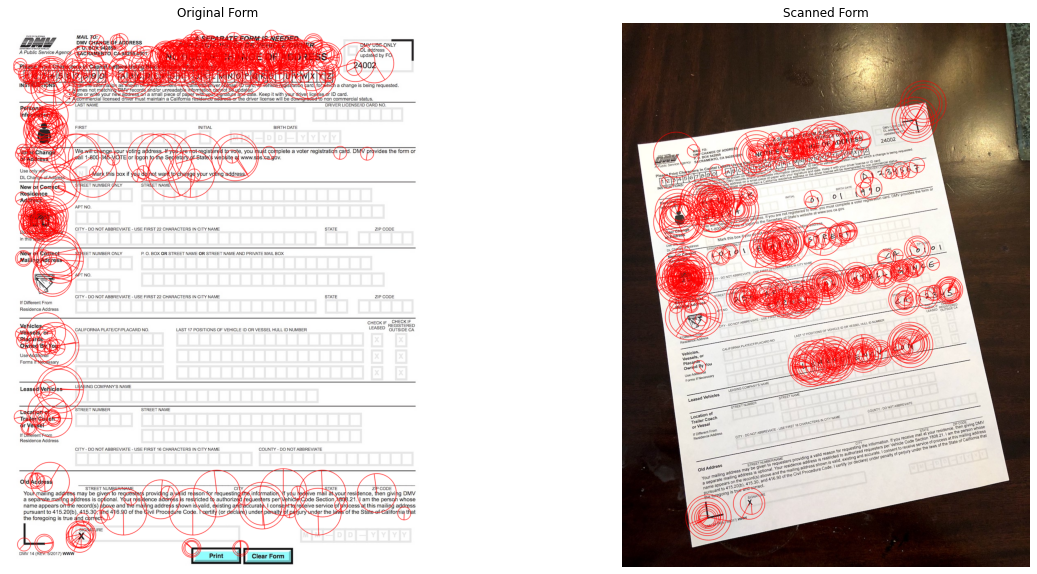

In [9]:
# Convert images to grayscale
im1_gray = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
im2_gray = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)
  
# Detect ORB features and compute descriptors.
MAX_NUM_FEATURES = 500
orb = cv.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Display 
im1_display = cv.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

### Step 3 : Match keypoints in the two image

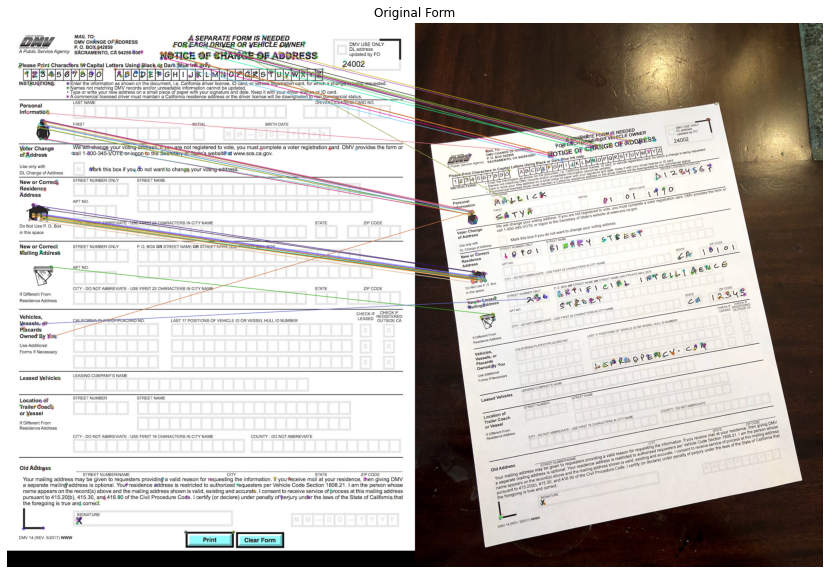

In [10]:
# Match features.
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = list(matcher.match(descriptors1, descriptors2, None))
  
# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

# Draw top matches
im_matches = cv.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(im_matches); plt.axis('off'); plt.title("Original Form");

### Step 4:  Find Homography

In [11]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt
  
# Find homography
h, mask = cv.findHomography(points2, points1, cv.RANSAC)

### Step 5: Warp image

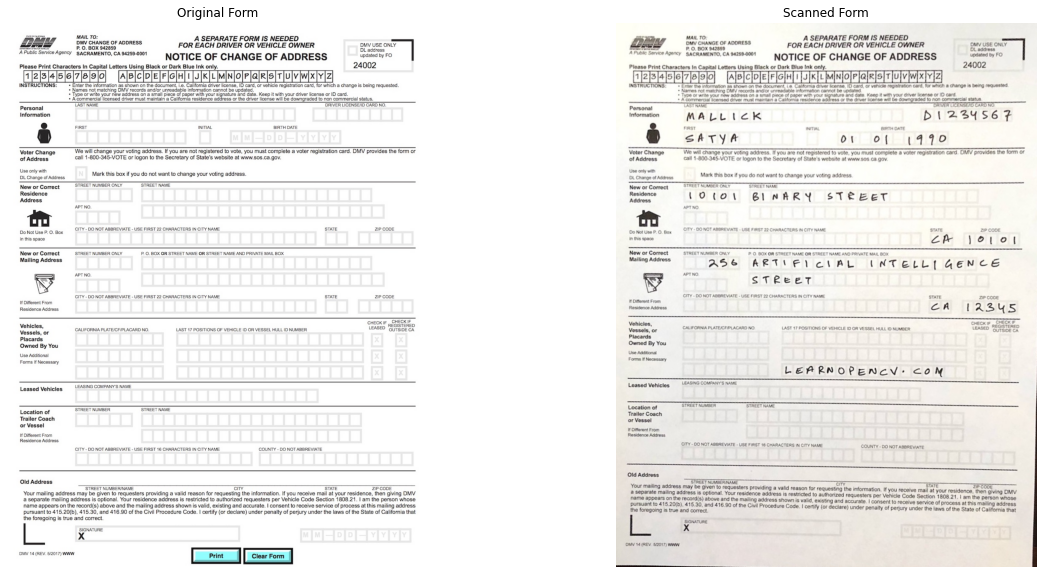

In [12]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv.warpPerspective(im2, h, (width, height))
# Display results 
plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.imshow(im1); plt.axis('off'); plt.title("Original Form");
plt.subplot(122); plt.imshow(im2_reg); plt.axis('off'); plt.title("Scanned Form");